## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [9]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [10]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [11]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [12]:
"""
Compile 模型
"""
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [13]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 7s 149us/step - loss: 1.9120 - acc: 0.3101 - val_loss: 1.7487 - val_acc: 0.3791
Epoch 2/500
50000/50000 [==============================] - 7s 143us/step - loss: 1.6890 - acc: 0.3962 - val_loss: 1.6200 - val_acc: 0.4267
Epoch 3/500
50000/50000 [==============================] - 7s 146us/step - loss: 1.6000 - acc: 0.4290 - val_loss: 1.5371 - val_acc: 0.4549
Epoch 4/500
50000/50000 [==============================] - 7s 144us/step - loss: 1.5224 - acc: 0.4581 - val_loss: 1.5082 - val_acc: 0.4585
Epoch 5/500
50000/50000 [==============================] - 7s 143us/step - loss: 1.4890 - acc: 0.4690 - val_loss: 1.4836 - val_acc: 0.4666
Epoch 6/500
50000/50000 [==============================] - 7s 148us/step - loss: 1.4453 - acc: 0.4833 - val_loss: 1.4658 - val_acc: 0.4745
Epoch 7/500
50000/50000 [==============================] - 7s 146us/step - loss: 1.4098 - acc: 0.4984 - val_loss: 1.

50000/50000 [==============================] - 7s 143us/step - loss: 0.5244 - acc: 0.8136 - val_loss: 2.0182 - val_acc: 0.5206
Epoch 60/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.5246 - acc: 0.8118 - val_loss: 1.9890 - val_acc: 0.5166
Epoch 61/500
50000/50000 [==============================] - 7s 143us/step - loss: 0.5033 - acc: 0.8174 - val_loss: 2.1062 - val_acc: 0.5066
Epoch 62/500
50000/50000 [==============================] - 7s 143us/step - loss: 0.4909 - acc: 0.8237 - val_loss: 2.0986 - val_acc: 0.5149
Epoch 63/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.4701 - acc: 0.8307 - val_loss: 2.1781 - val_acc: 0.5097
Epoch 64/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.4678 - acc: 0.8327 - val_loss: 2.1332 - val_acc: 0.5149
Epoch 65/500
50000/50000 [==============================] - 7s 143us/step - loss: 0.4643 - acc: 0.8317 - val_loss: 2.2314 - val_acc: 0.5083
Epoch 66/500
50000/50000 [=======

50000/50000 [==============================] - 7s 142us/step - loss: 0.2578 - acc: 0.9082 - val_loss: 3.4776 - val_acc: 0.5019
Epoch 118/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.2619 - acc: 0.9060 - val_loss: 3.4236 - val_acc: 0.4989
Epoch 119/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.2327 - acc: 0.9170 - val_loss: 3.4244 - val_acc: 0.5010
Epoch 120/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.2185 - acc: 0.9228 - val_loss: 3.4890 - val_acc: 0.4975
Epoch 121/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.2126 - acc: 0.9232 - val_loss: 3.5941 - val_acc: 0.4899
Epoch 122/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.2433 - acc: 0.9122 - val_loss: 3.4938 - val_acc: 0.4948
Epoch 123/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.2096 - acc: 0.9262 - val_loss: 3.4750 - val_acc: 0.5010
Epoch 124/500
50000/50000 [

50000/50000 [==============================] - 7s 142us/step - loss: 0.2512 - acc: 0.9151 - val_loss: 4.1859 - val_acc: 0.4833
Epoch 176/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.2170 - acc: 0.9260 - val_loss: 4.1354 - val_acc: 0.5021
Epoch 177/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.1102 - acc: 0.9615 - val_loss: 4.1680 - val_acc: 0.4981
Epoch 178/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.0976 - acc: 0.9667 - val_loss: 4.3275 - val_acc: 0.4937
Epoch 179/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.1159 - acc: 0.9594 - val_loss: 4.2843 - val_acc: 0.4882
Epoch 180/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.1985 - acc: 0.9322 - val_loss: 4.2029 - val_acc: 0.4985
Epoch 181/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.1754 - acc: 0.9383 - val_loss: 4.1954 - val_acc: 0.5050
Epoch 182/500
50000/50000 [

50000/50000 [==============================] - 7s 142us/step - loss: 0.1808 - acc: 0.9392 - val_loss: 4.5500 - val_acc: 0.4919
Epoch 234/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.1505 - acc: 0.9484 - val_loss: 4.5724 - val_acc: 0.4895
Epoch 235/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.0892 - acc: 0.9694 - val_loss: 4.5829 - val_acc: 0.4961
Epoch 236/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.0830 - acc: 0.9707 - val_loss: 4.7068 - val_acc: 0.4978
Epoch 237/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.1525 - acc: 0.9481 - val_loss: 4.6156 - val_acc: 0.4933
Epoch 238/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.1238 - acc: 0.9568 - val_loss: 4.5956 - val_acc: 0.4925
Epoch 239/500
50000/50000 [==============================] - 7s 143us/step - loss: 0.1425 - acc: 0.9521 - val_loss: 4.5924 - val_acc: 0.4919
Epoch 240/500
50000/50000 [

50000/50000 [==============================] - 7s 142us/step - loss: 0.0536 - acc: 0.9819 - val_loss: 4.8647 - val_acc: 0.4938
Epoch 292/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.0475 - acc: 0.9841 - val_loss: 4.8710 - val_acc: 0.4934
Epoch 293/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.0759 - acc: 0.9736 - val_loss: 4.8090 - val_acc: 0.4949
Epoch 294/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.2154 - acc: 0.9331 - val_loss: 4.8410 - val_acc: 0.4863
Epoch 295/500
50000/50000 [==============================] - 7s 143us/step - loss: 0.1518 - acc: 0.9509 - val_loss: 4.8357 - val_acc: 0.4921
Epoch 296/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.0957 - acc: 0.9667 - val_loss: 4.8639 - val_acc: 0.4945
Epoch 297/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.0610 - acc: 0.9797 - val_loss: 4.8491 - val_acc: 0.4939
Epoch 298/500
50000/50000 [

50000/50000 [==============================] - 7s 142us/step - loss: 0.0251 - acc: 0.9925 - val_loss: 4.9100 - val_acc: 0.4989
Epoch 350/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.0280 - acc: 0.9912 - val_loss: 4.9911 - val_acc: 0.4992
Epoch 351/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.0687 - acc: 0.9766 - val_loss: 4.9793 - val_acc: 0.4955
Epoch 352/500
50000/50000 [==============================] - 7s 143us/step - loss: 0.1750 - acc: 0.9468 - val_loss: 5.0185 - val_acc: 0.4917
Epoch 353/500
50000/50000 [==============================] - 7s 141us/step - loss: 0.1683 - acc: 0.9465 - val_loss: 4.9328 - val_acc: 0.4923
Epoch 354/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.0730 - acc: 0.9746 - val_loss: 4.8933 - val_acc: 0.4992
Epoch 355/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.0575 - acc: 0.9808 - val_loss: 5.0125 - val_acc: 0.4982
Epoch 356/500
50000/50000 [

50000/50000 [==============================] - 7s 142us/step - loss: 0.0078 - acc: 0.9983 - val_loss: 5.0654 - val_acc: 0.5020
Epoch 408/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.0055 - acc: 0.9992 - val_loss: 5.0785 - val_acc: 0.4993
Epoch 409/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.0044 - acc: 0.9995 - val_loss: 5.1335 - val_acc: 0.5043
Epoch 410/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.2552 - acc: 0.9389 - val_loss: 5.0464 - val_acc: 0.4712
Epoch 411/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.3935 - acc: 0.8986 - val_loss: 4.7542 - val_acc: 0.4896
Epoch 412/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.0849 - acc: 0.9699 - val_loss: 4.8987 - val_acc: 0.4939
Epoch 413/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.0378 - acc: 0.9879 - val_loss: 4.9218 - val_acc: 0.4970
Epoch 414/500
50000/50000 [

50000/50000 [==============================] - 7s 142us/step - loss: 0.0061 - acc: 0.9999 - val_loss: 4.6877 - val_acc: 0.5056
Epoch 466/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.0048 - acc: 0.9998 - val_loss: 4.7119 - val_acc: 0.5049
Epoch 467/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.0043 - acc: 0.9999 - val_loss: 4.7487 - val_acc: 0.5057
Epoch 468/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.0034 - acc: 1.0000 - val_loss: 4.7942 - val_acc: 0.5062
Epoch 469/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.0030 - acc: 1.0000 - val_loss: 4.8146 - val_acc: 0.5056
Epoch 470/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.0028 - acc: 0.9999 - val_loss: 4.8759 - val_acc: 0.5069
Epoch 471/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.0057 - acc: 0.9993 - val_loss: 4.9944 - val_acc: 0.4953
Epoch 472/500
50000/50000 [

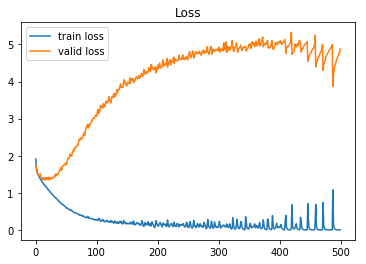

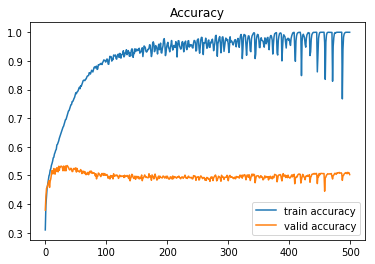

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [15]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer='sgd')

model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 5s 98us/step - loss: 0.0040 - acc: 0.9998 - val_loss: 4.8312 - val_acc: 0.5091
Epoch 2/500
50000/50000 [==============================] - 5s 94us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 4.8302 - val_acc: 0.5100
Epoch 3/500
50000/50000 [==============================] - 5s 94us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 4.8321 - val_acc: 0.5110
Epoch 4/500
50000/50000 [==============================] - 5s 94us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 4.8357 - val_acc: 0.5108
Epoch 5/500
50000/50000 [==============================] - 5s 94us/step - loss: 0.0019 - acc: 1.0000 - val_loss: 4.8387 - val_acc: 0.5100
Epoch 6/500
50000/50000 [==============================] - 5s 94us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 4.8417 - val_acc: 0.5107
Epoch 7/500
50000/50000 [==============================] - 5s 94us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 4.8444 - 

50000/50000 [==============================] - 5s 94us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 4.9715 - val_acc: 0.5103
Epoch 60/500
50000/50000 [==============================] - 5s 94us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 4.9737 - val_acc: 0.5106
Epoch 61/500
50000/50000 [==============================] - 5s 94us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 4.9754 - val_acc: 0.5102
Epoch 62/500
50000/50000 [==============================] - 5s 94us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 4.9773 - val_acc: 0.5104
Epoch 63/500
50000/50000 [==============================] - 5s 94us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 4.9792 - val_acc: 0.5106
Epoch 64/500
50000/50000 [==============================] - 5s 94us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 4.9806 - val_acc: 0.5100
Epoch 65/500
50000/50000 [==============================] - 5s 94us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 4.9826 - val_acc: 0.5104
Epoch 66/500
50000/50000 [==============

Epoch 117/500
50000/50000 [==============================] - 5s 94us/step - loss: 8.3338e-04 - acc: 1.0000 - val_loss: 5.0619 - val_acc: 0.5099
Epoch 118/500
50000/50000 [==============================] - 5s 95us/step - loss: 8.3014e-04 - acc: 1.0000 - val_loss: 5.0635 - val_acc: 0.5095
Epoch 119/500
50000/50000 [==============================] - 5s 94us/step - loss: 8.2665e-04 - acc: 1.0000 - val_loss: 5.0648 - val_acc: 0.5099
Epoch 120/500
50000/50000 [==============================] - 5s 94us/step - loss: 8.2382e-04 - acc: 1.0000 - val_loss: 5.0658 - val_acc: 0.5097
Epoch 121/500
50000/50000 [==============================] - 5s 94us/step - loss: 8.2062e-04 - acc: 1.0000 - val_loss: 5.0671 - val_acc: 0.5094
Epoch 122/500
50000/50000 [==============================] - 5s 94us/step - loss: 8.1726e-04 - acc: 1.0000 - val_loss: 5.0685 - val_acc: 0.5094
Epoch 123/500
50000/50000 [==============================] - 5s 94us/step - loss: 8.1407e-04 - acc: 1.0000 - val_loss: 5.0696 - val_acc:

Epoch 174/500
50000/50000 [==============================] - 5s 94us/step - loss: 6.8274e-04 - acc: 1.0000 - val_loss: 5.1280 - val_acc: 0.5094
Epoch 175/500
50000/50000 [==============================] - 5s 94us/step - loss: 6.8065e-04 - acc: 1.0000 - val_loss: 5.1290 - val_acc: 0.5093
Epoch 176/500
50000/50000 [==============================] - 5s 94us/step - loss: 6.7863e-04 - acc: 1.0000 - val_loss: 5.1295 - val_acc: 0.5094
Epoch 177/500
50000/50000 [==============================] - 5s 94us/step - loss: 6.7653e-04 - acc: 1.0000 - val_loss: 5.1305 - val_acc: 0.5096
Epoch 178/500
50000/50000 [==============================] - 5s 94us/step - loss: 6.7443e-04 - acc: 1.0000 - val_loss: 5.1315 - val_acc: 0.5096
Epoch 179/500
50000/50000 [==============================] - 5s 94us/step - loss: 6.7225e-04 - acc: 1.0000 - val_loss: 5.1326 - val_acc: 0.5097
Epoch 180/500
50000/50000 [==============================] - 5s 94us/step - loss: 6.7028e-04 - acc: 1.0000 - val_loss: 5.1338 - val_acc:

Epoch 231/500
50000/50000 [==============================] - 5s 94us/step - loss: 5.8016e-04 - acc: 1.0000 - val_loss: 5.1792 - val_acc: 0.5093
Epoch 232/500
50000/50000 [==============================] - 5s 95us/step - loss: 5.7863e-04 - acc: 1.0000 - val_loss: 5.1798 - val_acc: 0.5093
Epoch 233/500
50000/50000 [==============================] - 5s 94us/step - loss: 5.7712e-04 - acc: 1.0000 - val_loss: 5.1808 - val_acc: 0.5092
Epoch 234/500
50000/50000 [==============================] - 5s 94us/step - loss: 5.7557e-04 - acc: 1.0000 - val_loss: 5.1816 - val_acc: 0.5093
Epoch 235/500
50000/50000 [==============================] - 5s 94us/step - loss: 5.7409e-04 - acc: 1.0000 - val_loss: 5.1827 - val_acc: 0.5094
Epoch 236/500
50000/50000 [==============================] - 5s 94us/step - loss: 5.7262e-04 - acc: 1.0000 - val_loss: 5.1835 - val_acc: 0.5094
Epoch 237/500
50000/50000 [==============================] - 5s 94us/step - loss: 5.7096e-04 - acc: 1.0000 - val_loss: 5.1842 - val_acc:

Epoch 288/500
50000/50000 [==============================] - 5s 94us/step - loss: 5.0495e-04 - acc: 1.0000 - val_loss: 5.2217 - val_acc: 0.5093
Epoch 289/500
50000/50000 [==============================] - 5s 94us/step - loss: 5.0380e-04 - acc: 1.0000 - val_loss: 5.2224 - val_acc: 0.5094
Epoch 290/500
50000/50000 [==============================] - 5s 94us/step - loss: 5.0265e-04 - acc: 1.0000 - val_loss: 5.2231 - val_acc: 0.5096
Epoch 291/500
50000/50000 [==============================] - 5s 94us/step - loss: 5.0153e-04 - acc: 1.0000 - val_loss: 5.2238 - val_acc: 0.5093
Epoch 292/500
50000/50000 [==============================] - 5s 94us/step - loss: 5.0033e-04 - acc: 1.0000 - val_loss: 5.2245 - val_acc: 0.5094
Epoch 293/500
50000/50000 [==============================] - 5s 94us/step - loss: 4.9909e-04 - acc: 1.0000 - val_loss: 5.2253 - val_acc: 0.5094
Epoch 294/500
50000/50000 [==============================] - 5s 94us/step - loss: 4.9818e-04 - acc: 1.0000 - val_loss: 5.2258 - val_acc:

Epoch 345/500
50000/50000 [==============================] - 5s 94us/step - loss: 4.4719e-04 - acc: 1.0000 - val_loss: 5.2577 - val_acc: 0.5095
Epoch 346/500
50000/50000 [==============================] - 5s 94us/step - loss: 4.4630e-04 - acc: 1.0000 - val_loss: 5.2583 - val_acc: 0.5093
Epoch 347/500
50000/50000 [==============================] - 5s 95us/step - loss: 4.4541e-04 - acc: 1.0000 - val_loss: 5.2589 - val_acc: 0.5093
Epoch 348/500
50000/50000 [==============================] - 5s 94us/step - loss: 4.4455e-04 - acc: 1.0000 - val_loss: 5.2596 - val_acc: 0.5093
Epoch 349/500
50000/50000 [==============================] - 5s 94us/step - loss: 4.4363e-04 - acc: 1.0000 - val_loss: 5.2601 - val_acc: 0.5095
Epoch 350/500
50000/50000 [==============================] - 5s 94us/step - loss: 4.4282e-04 - acc: 1.0000 - val_loss: 5.2606 - val_acc: 0.5092
Epoch 351/500
50000/50000 [==============================] - 5s 94us/step - loss: 4.4190e-04 - acc: 1.0000 - val_loss: 5.2614 - val_acc:

Epoch 402/500
50000/50000 [==============================] - 5s 94us/step - loss: 4.0149e-04 - acc: 1.0000 - val_loss: 5.2893 - val_acc: 0.5091
Epoch 403/500
50000/50000 [==============================] - 5s 94us/step - loss: 4.0076e-04 - acc: 1.0000 - val_loss: 5.2898 - val_acc: 0.5092
Epoch 404/500
50000/50000 [==============================] - 5s 94us/step - loss: 4.0005e-04 - acc: 1.0000 - val_loss: 5.2904 - val_acc: 0.5093
Epoch 405/500
50000/50000 [==============================] - 5s 94us/step - loss: 3.9934e-04 - acc: 1.0000 - val_loss: 5.2908 - val_acc: 0.5093
Epoch 406/500
50000/50000 [==============================] - 5s 94us/step - loss: 3.9862e-04 - acc: 1.0000 - val_loss: 5.2913 - val_acc: 0.5092
Epoch 407/500
50000/50000 [==============================] - 5s 95us/step - loss: 3.9790e-04 - acc: 1.0000 - val_loss: 5.2917 - val_acc: 0.5089
Epoch 408/500
50000/50000 [==============================] - 5s 95us/step - loss: 3.9721e-04 - acc: 1.0000 - val_loss: 5.2924 - val_acc:

Epoch 459/500
50000/50000 [==============================] - 5s 94us/step - loss: 3.6427e-04 - acc: 1.0000 - val_loss: 5.3166 - val_acc: 0.5084
Epoch 460/500
50000/50000 [==============================] - 5s 94us/step - loss: 3.6368e-04 - acc: 1.0000 - val_loss: 5.3171 - val_acc: 0.5084
Epoch 461/500
50000/50000 [==============================] - 5s 94us/step - loss: 3.6310e-04 - acc: 1.0000 - val_loss: 5.3176 - val_acc: 0.5088
Epoch 462/500
50000/50000 [==============================] - 5s 94us/step - loss: 3.6248e-04 - acc: 1.0000 - val_loss: 5.3181 - val_acc: 0.5084
Epoch 463/500
50000/50000 [==============================] - 5s 94us/step - loss: 3.6194e-04 - acc: 1.0000 - val_loss: 5.3185 - val_acc: 0.5086
Epoch 464/500
50000/50000 [==============================] - 5s 95us/step - loss: 3.6135e-04 - acc: 1.0000 - val_loss: 5.3190 - val_acc: 0.5086
Epoch 465/500
50000/50000 [==============================] - 5s 94us/step - loss: 3.6076e-04 - acc: 1.0000 - val_loss: 5.3194 - val_acc:

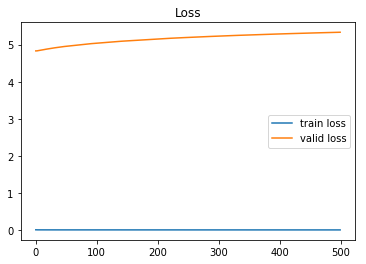

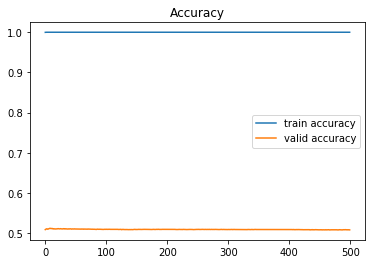

In [16]:
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()